In [2]:
import cv2,os

data_path=r'C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)   

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'del': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'nothing': 15, 'O': 16, 'P': 17, 'Q': 18, 'R': 19, 'S': 20, 'space': 21, 'T': 22, 'U': 23, 'V': 24, 'W': 25, 'X': 26, 'Y': 27, 'Z': 28}
['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [3]:
data_path=r'C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [4]:
data_path=r'C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train'



In [5]:
label_classes_dict=dict(zip(classesf,labels_classes))
print(label_classes_dict)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'del': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'nothing': 15, 'O': 16, 'P': 17, 'Q': 18, 'R': 19, 'S': 20, 'space': 21, 'T': 22, 'U': 23, 'V': 24, 'W': 25, 'X': 26, 'Y': 27, 'Z': 28}


In [6]:
import numpy as np

In [7]:
img_size = 128
data = []
target = []
minValue = 70

for category in categories:
    cat_path = os.path.join(data_path, category)
    print(f"Processing category: {cat_path}")
    
    # Check if the path is a directory
    if not os.path.isdir(cat_path):
        print(f"Skipping {cat_path} as it is not a directory.")
        continue

    img_names = os.listdir(cat_path)
    for img_name in img_names:
        img_path = os.path.join(cat_path, img_name)
        
        # Ensure we are processing only files (images), not directories
        if not os.path.isfile(img_path):
            print(f"Skipping {img_path} as it is not a file.")
            continue
        
        img = cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            blur = cv2.GaussianBlur(gray, (5,5), 2)
            th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
            ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            resized = cv2.resize(res, (img_size, img_size))
            
            data.append(resized)
            target.append(label_classes_dict[category])
        except Exception as e:
            print('Exception:', e)


Processing category: C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train\A
Processing category: C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train\B
Processing category: C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train\C
Processing category: C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train\D
Processing category: C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train\del
Processing category: C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train\E
Processing category: C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train\F
Processing category: C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train\G
Processing category: C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train\H
Processing category: C:\Users\Darsh\Desktop\Project\mp\asl_alphabet_train\asl_alphabet_train\I
Processing category: C:\Users\Darsh\Desktop\Proj

In [8]:
datanp1=np.array(data)
datanp1.shape

(87000, 128, 128)

In [9]:
targetnp1=np.array(target)

targetnp1.shape

(87000,)

In [10]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from tensorflow.keras.utils import to_categorical

new_target = to_categorical(target)
new_target.shape

 

(87000, 29)

In [11]:
np.save('data_img_new',data)
np.save('target_new',new_target)

In [13]:
data=np.load('data_img_new.npy')
target=np.load('target_new.npy')

In [ ]:
print(data)

[[[[0.        ]
   [0.60784314]
   [1.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.71372549]
   [1.        ]
   ...
   [0.84313725]
   [0.        ]
   [0.        ]]

  [[0.42745098]
   [0.84313725]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  ...

  [[0.        ]
   [0.84313725]
   [1.        ]
   ...
   [1.        ]
   [0.9372549 ]
   [0.88627451]]

  [[0.        ]
   [0.        ]
   [1.        ]
   ...
   [0.9372549 ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [1.        ]
   ...
   [0.88627451]
   [0.        ]
   [0.        ]]]


 [[[0.20392157]
   [0.71764706]
   [0.40392157]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.71372549]
   [0.90588235]
   ...
   [0.84313725]
   [0.        ]
   [0.        ]]

  [[0.45882353]
   [0.9372549 ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  ...

  [[0.        ]
   [0.84313725]
   [1. 

In [14]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [15]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=29, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

C:\Users\Darsh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │         1,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,716,573 (14.18 MB)

 Trainable params: 3,716,573 (14.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from keras.callbacks import ModelCheckpoint

In [ ]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [16]:
history=classifier.fit(train_data,train_target,shuffle=True,epochs=15,validation_split=0.3)


Epoch 1/15
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.2714 - loss: 2.3608 - val_accuracy: 0.8273 - val_loss: 0.4990
Epoch 2/15
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 113s 74ms/step - accuracy: 0.7506 - loss: 0.6714 - val_accuracy: 0.9128 - val_loss: 0.2513
Epoch 3/15
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 112s 74ms/step - accuracy: 0.8524 - loss: 0.4205 - val_accuracy: 0.9453 - val_loss: 0.1627
Epoch 4/15
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 112s 74ms/step - accuracy: 0.8951 - loss: 0.3029 - val_accuracy: 0.9598 - val_loss: 0.1260
Epoch 5/15
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 111s 73ms/step - accuracy: 0.9145 - loss: 0.2499 - val_accuracy: 0.9641 - val_loss: 0.1088
Epoch 6/15
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 113s 74ms/step - accuracy: 0.9312 - loss: 0.2083 - val_accuracy: 0.9662 - val_loss: 0.1044
Epoch 7/15
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 117s 77ms/step - accuracy: 0.9384 - loss: 0.1853 - val_accuracy: 0.9711 - val_loss: 0.0871
Epoch 8/15
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 114s 75ms/step - accuracy: 

In [17]:
print(classifier.evaluate(test_data,test_target))

544/544 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9832 - loss: 0.0614
[0.05892068147659302, 0.9821264147758484]


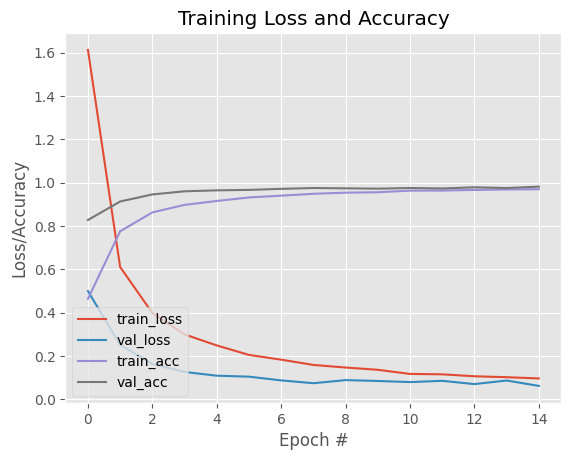

In [18]:
import matplotlib.pyplot as plt

N = 15
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

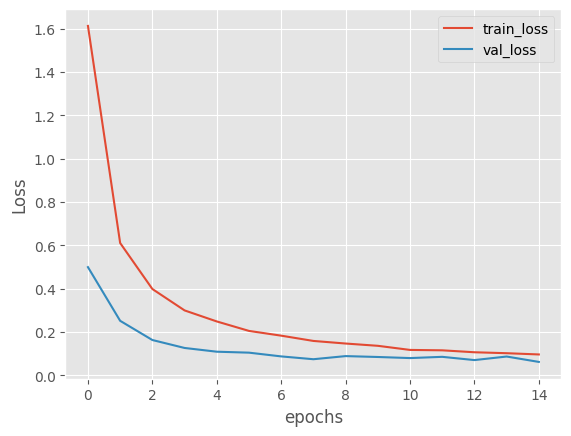

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

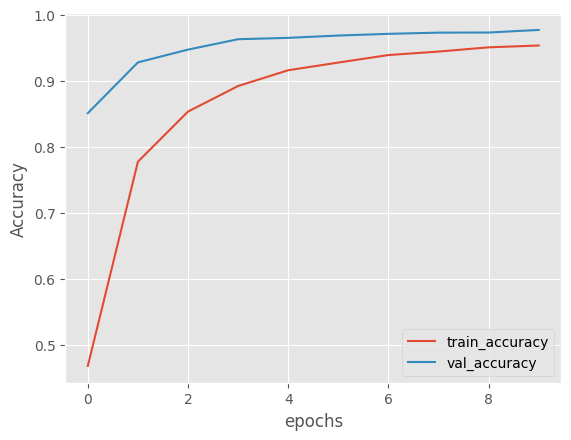

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()

In [21]:
# print("[INFO] saving mask detector model...")
classifier.save('asl_classifier_new1.h5')